Student: Meriem Chibani

# Introduction to PyTorch

  Study of PyTorch for computer vision. Study of methods for working with datasets, datasets transformation; datasets augmentation; study of autoencoder in PyTorch.

PyTorch -
An open-source machine learning framework that accelerates the path from research prototyping to production deployment. The framework was designed by Facebook.
    For installing the last version of torch, please visit the section installed on the official website  https://pytorch.org/.

\* For install without gpu chooses cpu from CUDA None subsection.

## Import torch

Let's for the first check aviliable of torch and its version.

In [1]:
import torch

print('version:',torch.version.__version__)

version: 2.6.0+cu124


Now we will import necessary libraries.

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

try:
    import torchinfo
except:
    !pip install torchinfo
finally:
    from torchinfo import torchinfo



In addition we will need to define some settings for `PyTorch` . The `PyTorch` support several types of devices, mainly  `CPU` and `GPU` form `NVidia` (i.e. `cuda`). However, the full list of devices for modern versions:  `cpu, cuda, xpu, mkldnn, opengl, opencl, ideep, hip, ve, ort, mlc, xla, lazy, vulkan, meta, hpu`.



In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

if device.type == 'cuda':
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    print('Cuda is available:',torch.cuda.is_available())

    n_devices = torch.cuda.device_count()
    print('number of devices: %d'%(n_devices))

    for cnt_device in range(n_devices):
        print(torch.cuda.get_device_name(cnt_device))
        print('Memory Usage:')
        print('Allocated:', round(torch.cuda.memory_allocated(cnt_device)/1024**3,1), 'GB')
        print('Cached:   ', round(torch.cuda.memory_reserved(cnt_device)/1024**3,1), 'GB')


num_workers=os.cpu_count()
print ('available number of workers:',num_workers)

dtype = torch.float
torch.set_default_dtype(dtype) # float32
print('Current data type:',dtype)

Using device: cpu
available number of workers: 2
Current data type: torch.float32


In addition, for making your experiment more reproducible we will set the following

In [5]:
seed = 42
torch.manual_seed(seed) #cpu
torch.cuda.manual_seed(seed) #gpu
np.random.seed(seed) #numpy
random.seed(seed) # random and transforms

torch.backends.cudnn.deterministic=True #cudnn
# torch.use_deterministic_algorithms(True)

[]()
For learning the initial principles of work you may visit those manuals
    
* [here for beginners](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html);
* [examples](https://pytorch.org/tutorials/);
* [also examples](https://github.com/pytorch/examples).

---

## Data types


Basic type of data in the PyTorch - is the multidimensional array - i.e. so-called tensor.

![image_tensor.png](https://cdn-images-1.medium.com/max/2000/1*_D5ZvufDS38WkhK9rK32hQ.jpeg)

The following examples of tensors are

In [6]:
x = torch.tensor(3.)
print(f'scalar: {x}, {x.ndim}-d dimention\n')

x = torch.tensor([3.,2])
print(f'vector: {x}, {x.ndim}-d dimention\n')

x = torch.tensor([[1.,2],[3.,4]])
print(f'matrix: \n{x},\n {x.ndim}-d dimention\n')

x = torch.tensor([[[1.,2],[3.,4]],[[5.,6],[7.,8]]])
print(f'set of matrix: \n{x},\n {x.ndim}-d dimention\n')
print(f' and so on')

scalar: 3.0, 0-d dimention

vector: tensor([3., 2.]), 1-d dimention

matrix: 
tensor([[1., 2.],
        [3., 4.]]),
 2-d dimention

set of matrix: 
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]]),
 3-d dimention

 and so on


Most of the operations with tensors in `PyTorch` are similar to the `NumPy`.

In [7]:
x = torch.randn(2, 3)

y = torch.ones(2,3) * 2

l = torch.FloatTensor([[5,6,7],[8,9,10]]) # tensor or defined type

n = torch.tensor([[0,1,2],[3,4,5]]).type(dtype) # тип по умолчанию

m = torch.from_numpy(np.ones([2,3], dtype=np.float32)) * 0.1 # need to select type manually

#-------------------
z = x + y*m + torch.exp(x)+torch.sqrt(n) + torch.pow(l,1.1)
print(z)

a = y[:,:1] + 1
print(a)

s = torch.transpose(z,0,1) #transposition with axis pointing

print(s.detach().cpu().numpy())

z = s@s.T #matrix multiplication
print(z)

z = s.matmul(s.T) #matrix multiplication
print(z)

tensor([[ 7.8101,  9.6437, 11.6166],
        [13.2706, 12.6141, 15.6690]])
tensor([[3.],
        [3.]])
[[ 7.81009  13.270558]
 [ 9.64367  12.614071]
 [11.616604 15.668995]]
tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])
tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])


In [8]:
z = s.mm(s.T) #matrix multiplication
print(z)

z = torch.mm(y.T, m) #matrix multiplication
print(z)
z = s@s.T #matrix multiplication
print(z)

z = s.matmul(s.T) #matrix multiplication
print(z)

z = torch.mv(m.T,y[:,0]) #matrix to vector multiplication
print(z)

z = torch.dot(m[:,0],y[:,1]) #inner vector product
print(z)

tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])
tensor([[0.4000, 0.4000, 0.4000],
        [0.4000, 0.4000, 0.4000],
        [0.4000, 0.4000, 0.4000]])
tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])
tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])
tensor([0.4000, 0.4000, 0.4000])
tensor(0.4000)


In [9]:
x = torch.randn(2, 3)#.to('cuda')
x.device
x.cpu().data.numpy()

array([[ 2.2082014 , -0.63799703,  0.46165723],
       [ 0.26735088,  0.53490466,  0.8093572 ]], dtype=float32)

In [10]:
z = x.clone()
z

tensor([[ 2.2082, -0.6380,  0.4617],
        [ 0.2674,  0.5349,  0.8094]])

However, there are several specific operations

In [11]:
print(z.view(1,- 1)) #reshape

print(z.view(1,1,-1))# exceed size

print(z.view(-1, 1)) #reshape
print(z.view(3, -1)) #reshape

tensor([[ 2.2082, -0.6380,  0.4617,  0.2674,  0.5349,  0.8094]])
tensor([[[ 2.2082, -0.6380,  0.4617,  0.2674,  0.5349,  0.8094]]])
tensor([[ 2.2082],
        [-0.6380],
        [ 0.4617],
        [ 0.2674],
        [ 0.5349],
        [ 0.8094]])
tensor([[ 2.2082, -0.6380],
        [ 0.4617,  0.2674],
        [ 0.5349,  0.8094]])


In [12]:
print(z.unsqueeze(1)) #reshape
print(z.squeeze()) #reshape
print(z.ravel()) #reshape
print(z.permute((1,0))) #reshape

tensor([[[ 2.2082, -0.6380,  0.4617]],

        [[ 0.2674,  0.5349,  0.8094]]])
tensor([[ 2.2082, -0.6380,  0.4617],
        [ 0.2674,  0.5349,  0.8094]])
tensor([ 2.2082, -0.6380,  0.4617,  0.2674,  0.5349,  0.8094])
tensor([[ 2.2082,  0.2674],
        [-0.6380,  0.5349],
        [ 0.4617,  0.8094]])


In [13]:
x = torch.randn(2, 3)

y = torch.ones(2,3) * 2

z = torch.cat([x,y]) #dim = 0
print(z.shape,x.shape,y.shape)

z = torch.cat([x,y], dim=1)
print(z.shape)

torch.Size([4, 3]) torch.Size([2, 3]) torch.Size([2, 3])
torch.Size([2, 6])


In [14]:
x = torch.randn(2, 3)
print(x.shape)
x = torch.stack((x, x))
print(x.shape)
x = torch.split(x,1)
print(x[0].shape, x[1].shape )

torch.Size([2, 3])
torch.Size([2, 2, 3])
torch.Size([1, 2, 3]) torch.Size([1, 2, 3])


Also, some operations in `PyTorch` exist in two variants: `immutable` with creating new output in the memory and `mutable` with rewriting variable with operation result.

In [15]:
x = torch.randn(2, 3)
y = torch.ones(2,3) * 2
print('inputs:\n',x,'\n',y,'\n');
z = torch.add(x,y)
print('result imutable\n',z)
x.add_(y)
print('\nresult mutable\n',x)

inputs:
 tensor([[ 0.2815,  0.0562,  0.5227],
        [-0.2384, -0.0499,  0.5263]]) 
 tensor([[2., 2., 2.],
        [2., 2., 2.]]) 

result imutable
 tensor([[2.2815, 2.0562, 2.5227],
        [1.7616, 1.9501, 2.5263]])

result mutable
 tensor([[2.2815, 2.0562, 2.5227],
        [1.7616, 1.9501, 2.5263]])


Also `PyTorch` support so called `broadcasting` as property of making operations with different shape if sizes of last dimentions are the same or some of them 1.

In [16]:
x = torch.randn(  2,3)
y = torch.randn(2,2,3)
# print((x+y), end='\n\n')
print(f'Case 1: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(2,1,3)
y = torch.randn(2,  3)
# print((x+y), end='\n\n')
print(f'Case 2: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(2,1,1,1,1,3)
y = torch.randn(2, 2, 3)
print(f'Case 3: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(1,2,1,1,3)
y = torch.randn(2, 2, 3)
print(f'Case 4: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(5,6,3,3)
y = torch.randn(    3,3)
print(f'Case 5: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

Case 1: input x:torch.Size([2, 3]), y:torch.Size([2, 2, 3]), output torch.Size([2, 2, 3])

Case 2: input x:torch.Size([2, 1, 3]), y:torch.Size([2, 3]), output torch.Size([2, 2, 3])

Case 3: input x:torch.Size([2, 1, 1, 1, 1, 3]), y:torch.Size([2, 2, 3]), output torch.Size([2, 1, 1, 2, 2, 3])

Case 4: input x:torch.Size([1, 2, 1, 1, 3]), y:torch.Size([2, 2, 3]), output torch.Size([1, 2, 2, 2, 3])

Case 5: input x:torch.Size([5, 6, 3, 3]), y:torch.Size([3, 3]), output torch.Size([5, 6, 3, 3])



Also some operations support pointing the output as argument

In [17]:
x = torch.randn(2, 3)
y = torch.ones(2,3) * 2

d = torch.zeros_like(x)

torch.add(x,y,out = d)
print(d)

tensor([[0.8716, 2.2457, 1.9424],
        [1.7777, 1.5264, 2.4768]])


The simple assignment operator assumes sharing the same memory.

If you want to create a new object in the memory use clone method.

In [18]:
a = x
b = x.clone()
print(a)
x[0,0]=100
print(a)
print(b)

tensor([[-1.1284,  0.2457, -0.0576],
        [-0.2223, -0.4736,  0.4768]])
tensor([[ 1.0000e+02,  2.4570e-01, -5.7579e-02],
        [-2.2230e-01, -4.7361e-01,  4.7679e-01]])
tensor([[-1.1284,  0.2457, -0.0576],
        [-0.2223, -0.4736,  0.4768]])


Also you may carring operations on the `CPU` or predefined device using method `to()`. In this case to return tensor on the `CPU` use method `cpu()`.

In [19]:
x = torch.tensor([1,2]).to(device)
print(x.is_cuda)
print(x.cpu().is_cuda)

False
False


### Specific methods for Neural Networks in PyTorch

### Activation functions

In [20]:
data = torch.randn(2, 2)
print(data)
print(torch.relu(data))

tensor([[ 0.1760, -0.3570],
        [ 0.6592, -1.1307]])
tensor([[0.1760, 0.0000],
        [0.6592, 0.0000]])


In [21]:
data = torch.randn(2, 2)
print(data)
print(torch.sigmoid(data))

tensor([[ 0.2229,  1.2297],
        [ 0.1355, -1.4416]])
tensor([[0.5555, 0.7738],
        [0.5338, 0.1913]])


In [22]:
data = torch.randn(2, 2)
print(data)
print(torch.tanh(data))

tensor([[-1.5408, -1.9235],
        [-0.4828,  0.9609]])
tensor([[-0.9123, -0.9582],
        [-0.4484,  0.7447]])


#### Layers

In [23]:
# Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
import torch
from torch import nn

lin = nn.Linear(5, 3)  # maps from R^5 to R^3, parameters A, b
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = torch.randn(2, 5)
print(lin(data))
print(lin(data).size())

tensor([[ 0.5112,  0.0454, -0.4435],
        [-0.1393, -0.1066,  0.4182]], grad_fn=<AddmmBackward0>)
torch.Size([2, 3])


In [24]:
import torch.nn.functional as F
F.celu(data)

tensor([[ 0.6453,  0.4358, -0.2459, -0.7024, -0.7167],
        [-0.0796, -0.4980,  0.3920,  1.0654, -0.4324]])

In [25]:
# Applies a 1D convolution over an input signal composed of several input planes.

lin = nn.Conv1d(in_channels  = 5,
                out_channels = 3,
                kernel_size  = 2,
                stride       = 1,
                padding_mode = 'zeros',)
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = torch.randn(1, 5, 2)
print(lin(data))
print(lin(data).size())

tensor([[[-1.4251],
         [-0.0979],
         [ 0.0822]]], grad_fn=<ConvolutionBackward0>)
torch.Size([1, 3, 1])


In [26]:
# Applies a 1D max pooling over an input signal composed of several input planes.

lin = nn.MaxPool1d(kernel_size = 2,
                   stride      = 1)
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = torch.randn(1, 5, 2)
print(lin(data))
print(lin(data).size())

tensor([[[-1.3995],
         [ 0.1188],
         [ 0.3981],
         [ 0.8526],
         [-0.0187]]])
torch.Size([1, 5, 1])


In [27]:
# Applies a 2D convolution over an input signal composed of several input planes.

lin = nn.Conv2d(in_channels  = 5,
                out_channels = 3,
                kernel_size  = 2,
                stride       = 1,
                padding_mode = 'zeros',)

data = torch.randn(1, 5, 4, 2)
print(lin(data))
print(lin(data).size())

tensor([[[[ 0.8069],
          [ 0.0671],
          [-0.3078]],

         [[ 1.2144],
          [-0.5697],
          [-0.2239]],

         [[ 0.8578],
          [ 0.3140],
          [-1.7403]]]], grad_fn=<ConvolutionBackward0>)
torch.Size([1, 3, 3, 1])


In [28]:
# Applies a multi-layer Elman RNN with :math:`tanh` or :math:`ReLU` non-linearity to an input sequence.

rnn  = nn.RNN(3, 2, 2)
data = torch.randn(3, 2, 3)
h0   = torch.randn(2, 2, 2)
c0   = torch.randn(2, 2, 2)
output, hn = rnn(data, h0)
print(output)
print(output.size())

tensor([[[-4.3631e-04,  9.0011e-01],
         [-2.8869e-01,  8.4176e-01]],

        [[ 2.6678e-01,  2.9053e-01],
         [ 5.6834e-02,  8.9256e-02]],

        [[ 1.3078e-01,  5.6819e-01],
         [ 4.7499e-02,  6.1089e-01]]], grad_fn=<StackBackward0>)
torch.Size([3, 2, 2])


In [29]:
# Applies a multi-layer long short-term memory (LSTM) RNN to an input sequence.

rnn  = nn.LSTM(3, 2, 2)
data = torch.randn(2, 2, 3)
h0   = torch.randn(2, 2, 2)
c0   = torch.randn(2, 2, 2)
output, (hn, cn) = rnn(data, (h0, c0))
print(output)
print(output.size())

tensor([[[-4.2328e-01, -9.1519e-03],
         [-1.3289e-01,  2.4176e-02]],

        [[-3.8854e-01, -5.7898e-03],
         [-2.7310e-01, -1.3414e-04]]], grad_fn=<MkldnnRnnLayerBackward0>)
torch.Size([2, 2, 2])


## Automatic differentiation

Each of the operation in the torch is the graph of computations

![softmax_graph.png](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1520609448/comp_graph_oncyni.png)

PyTorch support automatic differentiation when the corresponding argument is set for tensor.

In [30]:
x = torch.tensor([3.,4.])
w = torch.tensor([4.,8], requires_grad=True)
b = torch.tensor(5., requires_grad=True)

print(x,w,b)

tensor([3., 4.]) tensor([4., 8.], requires_grad=True) tensor(5., requires_grad=True)


you may use variables in the same as tensors.

In [31]:
y = w @ x + b
print(y)

tensor(49., grad_fn=<AddBackward0>)


In [32]:
print(y.grad_fn)

Let's assume we have some labels and we can calculate error of our simple linear model.

In [33]:
y_label = torch.tensor([40])
error = y_label - y #loss function
error

tensor([-9.], grad_fn=<SubBackward0>)

Than we can take the automatic gradient by using `backward` method.  

In [34]:
print('current gradient:',x.grad,w.grad,b.grad)

de = torch.sum(error).backward(retain_graph=True)

print(''' sum of de/dw:''', w.grad)
print('sum of de/db:', b.grad)

with torch.no_grad():

    w -= w.grad
    b -= b.grad

    w.grad.data.zero_()
    b.grad.data.zero_()


print( w.grad, b.grad)

current gradient: None None None
 sum of de/dw: tensor([-3., -4.])
sum of de/db: tensor(-1.)
tensor([0., 0.]) tensor(0.)


We can also make manual updating of new weights, for this it is highly recommended to use `with torch.no_grad()` directive.

In [35]:
LR = 0.01 # learning rate

x       = torch.tensor([3.,4.])
y_label = torch.tensor([40])
w = torch.tensor([4.,8], requires_grad=True)
b = torch.tensor(5., requires_grad=True)

y = x*w+b

error = y_label - y

loss = error.square().sum()

loss.backward(retain_graph=True)

# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * LR
    b -= b.grad * LR
    w.grad.zero_()
    b.grad.zero_()

For making automatic difference `PyTorch` build dynamic computational graph. You may learn it using `torchviz` library for graph visualization.
```python
    try:
        import torchviz
    except:
        !pip install torchviz
        !pip install graphviz
    finally:
        from torchviz import make_dot
    from torch import nn
    model = nn.Sequential()
    model.add_module('W0', nn.Linear(8, 16))
    x = torch.randn(1,8)
    y = model(x)
    make_dot(y, params=dict(model.named_parameters()))
```




![torch_graph](https://miro.medium.com/max/700/1*K2QnR_TRF9XfqNgNGDRqng.png)

---

## Linear regression PyTorch

For the first let's analyze linear regression example

$y=а\cdotх+b$

where:
*  $а$ is the slope.
* $b$ — is the bias.


In the matrix Form

$ y =  X \cdot W^T + b$

where:
* X - is the input tensor;
* W - is the weights tensor without bias, for instance, W = a;
* b - is the bias tensor (with less on one dim in comparison with  W);
* y - output tensor.

In the practice, W can include b as one of the part


![lineRegression](https://coderlessons.com/wp-content/uploads/2019/07/interpreting_result-1.jpg)

### Manual implementation PyTorch

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torch.nn as nn
from torch.autograd import Variable
%matplotlib inline

torch.manual_seed(1969)

# import seaborn as sns
# import pandas as pd
# sns.set_style(style = 'whitegrid')
# plt.rcParams["patch.force_edgecolor"] = True

dataset

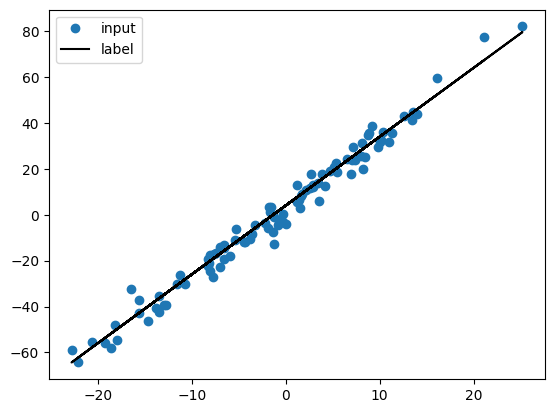

In [37]:
x = torch.randn(100, 1) * 10
y_clear = 3*x + 4
y = y_clear + 5 * torch.randn(100, 1)

plt.plot(x,y,'o', label = 'input')
plt.plot(x,y_clear,'-k', label = 'label')
plt.legend()
plt.show()

In [38]:
# inputs  = torch.from_numpy(x)
# targets = torch.from_numpy(y)
inputs = x
targets = y
print(inputs.shape)

torch.Size([100, 1])


weights and bias

In [39]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w)
print(b)

tensor([0.7502], requires_grad=True)
tensor([-0.4575], requires_grad=True)


model

In [40]:
def model(x,w,b):
    return x * w + b

loss function

$ MSE = \sum (y-x)^2 / N$

In [41]:
def mse(predicts, targets):
    diff = torch.abs(predicts - targets)
    return torch.sum(diff * diff) / diff.numel()

initial error

In [42]:
predicts = model(inputs,w,b)
# print(predicts)

loss = mse(predicts, targets)
print('loss = ',loss.data.numpy())


loss =  515.2697


one backward step (gradient)

In [43]:
predicts = model(inputs,w,b)
loss = mse(predicts, targets)
loss.backward()
db = b.grad
dw = w.grad


weighs updating

In [44]:
LR = 0.005

# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * LR
    b -= b.grad * LR
    w.grad.zero_()
    b.grad.zero_()



let's make 100 epochs of weights updating

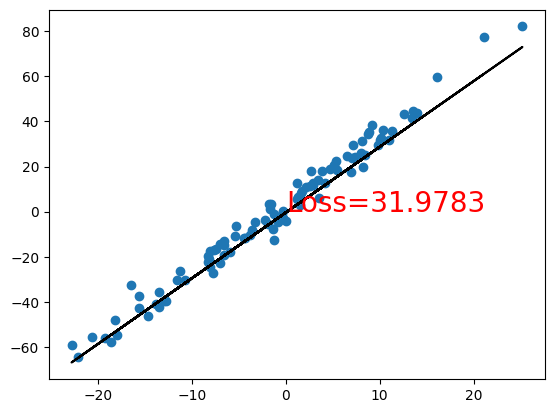

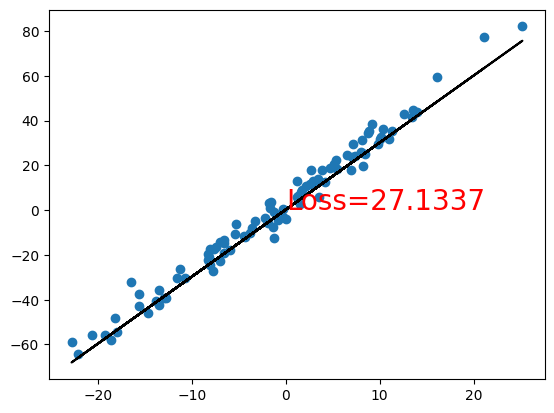

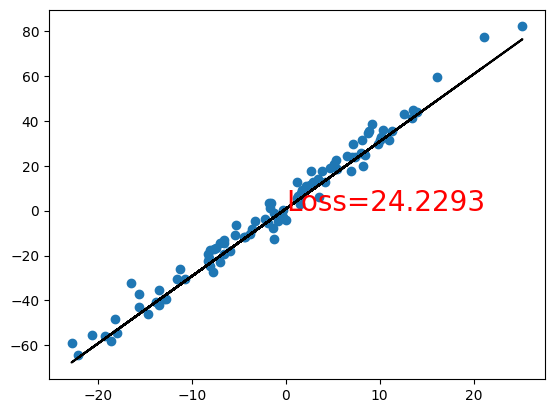

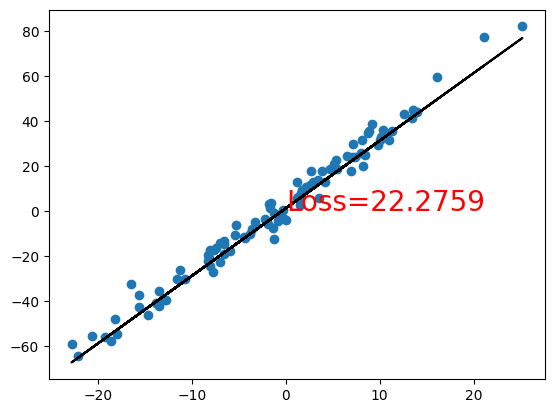

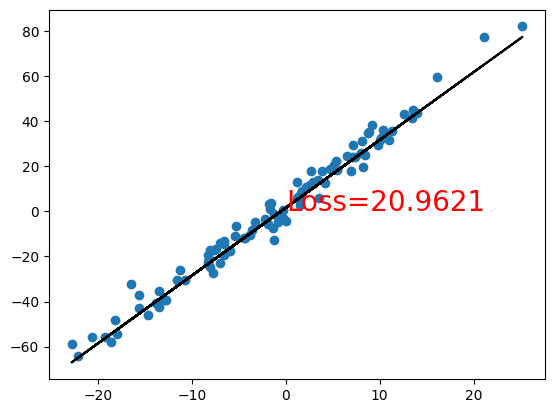

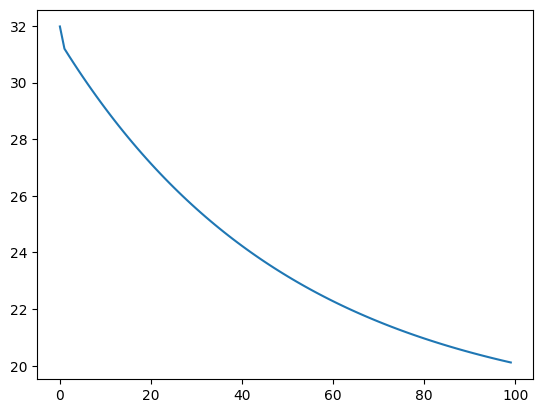

In [45]:
epochs = 100
LR = 0.005

trainig = np.zeros(epochs)
for i in range(epochs):
    predicts = model(inputs,w,b)
    loss = mse(predicts, targets)
    trainig[i] = loss.data.numpy()
    loss.backward()
    with torch.no_grad():
        w -= w.grad * LR
        b -= b.grad * LR
        w.grad.zero_()
        b.grad.zero_()

    if(i%20 == 0):
        plt.plot(x,targets.data.numpy(),'o')
        plt.plot(x,predicts.data.numpy(),'-k')
        plt.text(0.1, 0.1, 'Loss=%.4f' %(trainig[i]), fontdict={'size': 20, 'color': 'red'})
        plt.show()

plt.plot(trainig)


let's test the model

In [46]:
predicts = model(inputs,w,b)
loss = mse(predicts, targets)
print(loss)


tensor(20.0785, grad_fn=<DivBackward0>)


obtained values of slope and shift

In [47]:
print(w)
print(b)

tensor([3.0138], requires_grad=True)
tensor([1.8521], requires_grad=True)


**results**

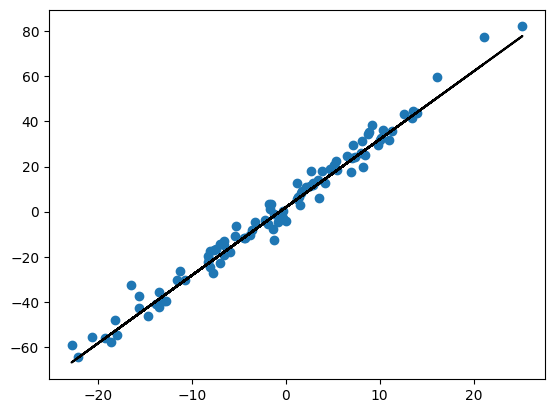

In [48]:
plt.plot(x,targets.data.numpy(),'o')
plt.plot(x,predicts.data.numpy(),'-k')

### Regression in  PyTorch  with built-in methods

Let's create regression class.

!In the PyTorch it is necessary to implement you methods using class as classes inherited from nn.Module!

In [49]:
class LinearRegression(nn.Module):

    def __init__(self, in_features=1, out_features=1 ):
        super().__init__()
        self.l1 = nn.Linear(in_features=in_features, out_features=out_features)

    def forward(self, x):
        return self.l1(x)



Also you can use Sequential conteiner, but we not reccommend to use it

In [50]:
model = nn.Sequential(nn.Linear(in_features=1, out_features=1))
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

our model in class form

In [51]:
model = LinearRegression(1,1)
model

LinearRegression(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)

Select Stochastic Gradient  Descent as optimizer

In [52]:
LR = 0.01
criterion = nn.MSELoss()

param = model.parameters()

optimizer = torch.optim.SGD(param, lr=LR)

w,b   = model.parameters()
print(w,b)

Parameter containing:
tensor([[0.0981]], requires_grad=True) Parameter containing:
tensor([0.9624], requires_grad=True)


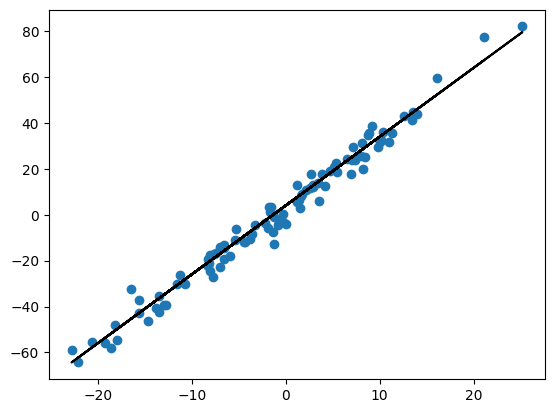

In [53]:
plt.plot(x,y,'o')
plt.plot(x,y_clear,'-k')


test

Epoch:  1  Loss:  839.4595336914062
Epoch:  21  Loss:  73.76217651367188
Epoch:  41  Loss:  22.771474838256836
Epoch:  61  Loss:  18.958675384521484
Epoch:  81  Loss:  18.48963165283203


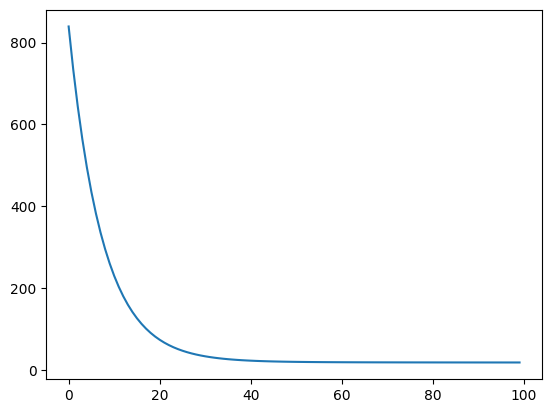

In [54]:
epochs = 100
losses = np.zeros(epochs)

for i in range(epochs):
    #FORWARD
    predict = model.forward(x)
    loss = criterion(predict, y)
    #BACKWARD
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses[i] = loss.data.numpy()
    if(i//20 == i/20):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

In [55]:
[w, b]    = model.parameters()
print(w[0],b[0])


tensor([3.0230], grad_fn=<SelectBackward0>) tensor(2.8976, grad_fn=<SelectBackward0>)


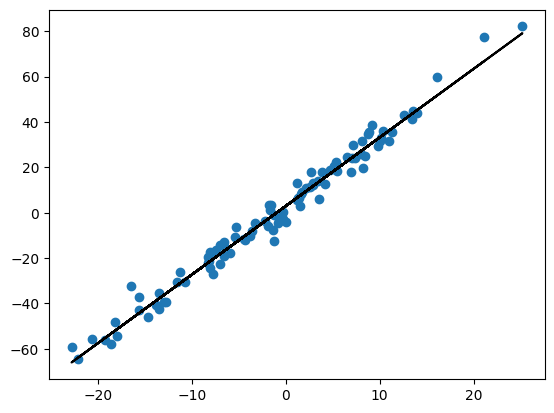

In [56]:
with torch.no_grad():
    predict = model.forward(x)
plt.plot(x,y.data.numpy(),'o')
plt.plot(x,predict.data.numpy(),'-k')

**Let's look on the data you may obtain from the model**

In [57]:
print(list(model.parameters()))

print(list(model.state_dict()))

# print(list(model.named_buffers()))
print(list(model.named_parameters()))

[Parameter containing:
tensor([[3.0230]], requires_grad=True), Parameter containing:
tensor([2.8976], requires_grad=True)]
['l1.weight', 'l1.bias']
[('l1.weight', Parameter containing:
tensor([[3.0230]], requires_grad=True)), ('l1.bias', Parameter containing:
tensor([2.8976], requires_grad=True))]


In [58]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of trainable parameters for the model: %d' % (num_params))

num_params = sum(p.numel() for p in model.parameters() )
print('Number of all parameters for the model: %d' % (num_params))

Number of trainable parameters for the model: 2
Number of all parameters for the model: 2


beside this you may use method ```summary``` from the library ```torchsummary```

In [59]:
summary(model,input_size = x.shape[1:])

NameError: name 'summary' is not defined

now we can try to save the model

In [60]:
torch.save(model.state_dict(), 'test_module.pt')

and to delete it

In [61]:
del(model)

So, we can upload it, but with
a new name, for instance ```new_model```

In [62]:
new_state_dict = torch.load('test_module.pt', weights_only=True)
new_model = LinearRegression(1,1)
new_model.load_state_dict(new_state_dict)

<All keys matched successfully>

let's test new_model

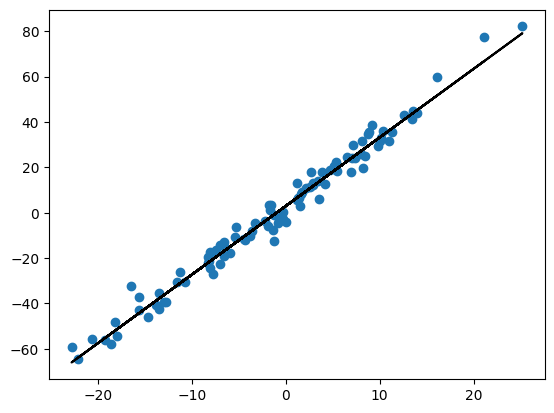

In [63]:
predict = new_model.forward(x)
plt.plot(x,y.data.numpy(),'o')
plt.plot(x,predict.data.numpy(),'-k')

Also we can save it using JIT scripts, it would be useful if you are going to use the model in other frameworks

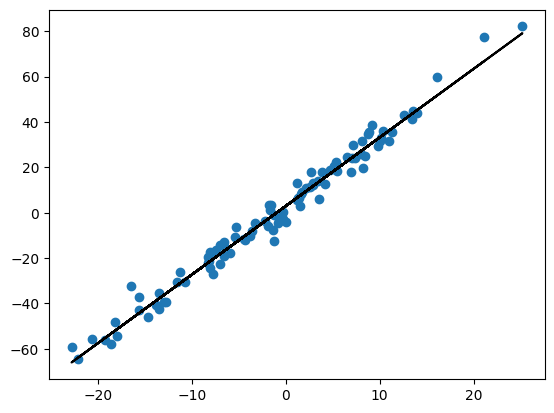

In [64]:
scripted_module = torch.jit.script(new_model)
torch.jit.save(scripted_module, 'mymodule.pt')
again_new_model = torch.jit.load('mymodule.pt')

predict = again_new_model.forward(x)
plt.plot(x,y.data.numpy(),'o')
plt.plot(x,predict.data.numpy(),'-k')

### Exercise 1

Implement square regression using PyTorch
$y = w_1\cdot x^2 + w_2\cdot x + b = w_1\cdot x_1 + w_2\cdot x_2 + b$

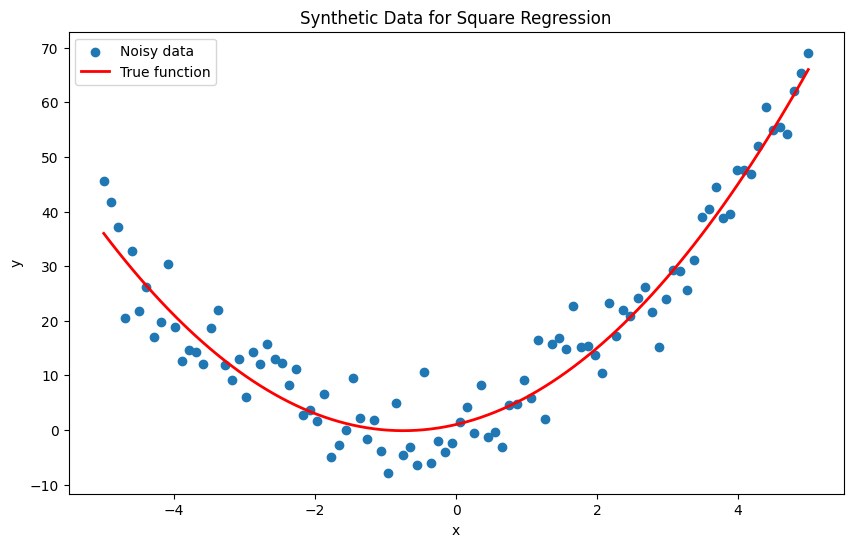

In [101]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Generating synthetic data
x = torch.linspace(-5, 5, 100).view(-1, 1)
# True parameters: w1=2, w2=3, b=1
y_clean = 2 * x**2 + 3 * x + 1
y = y_clean + torch.randn_like(x) * 5  # Add some noise

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Noisy data')
plt.plot(x, y_clean, 'r-', linewidth=2, label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Synthetic Data for Square Regression')
plt.show()

SquareRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Epoch [100/1000], Loss: inf
Epoch [200/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan
Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan


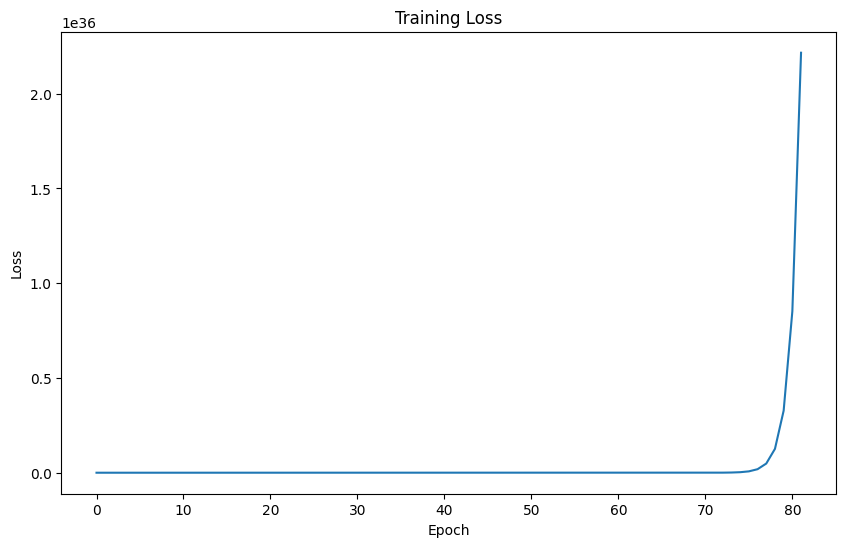

linear.weight: tensor([[nan, nan]])
linear.bias: tensor([nan])


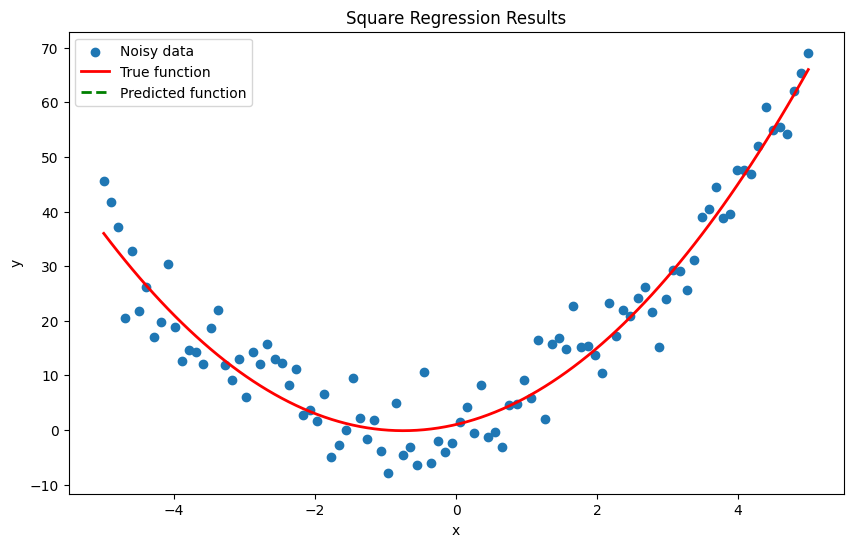

In [102]:


# Creatting input features: [x^2, x]
X = torch.cat([x**2, x], dim=1)

# Define the model
class SquareRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)  # 2 input features (x² and x), 1 output

    def forward(self, x):
        return self.linear(x)

model = SquareRegression()
print(model)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plotting training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Getting the learned parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

# Make predictions
with torch.no_grad():
    predicted = model(X).detach()

# Plotting results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Noisy data')
plt.plot(x, y_clean, 'r-', linewidth=2, label='True function')
plt.plot(x, predicted, 'g--', linewidth=2, label='Predicted function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Square Regression Results')
plt.show()

### Exercise 2

Instead of using implementation above, you may apply standart template, one fo them `Sequential`
that can applied, like it is shown below
```python
model = nn.Sequential(nn.Linear(n_inputs, n_outputs))
```
Omplement linear regression using `Sequential`

In [106]:


# Data with automatic feature expansion
class PolynomialFeatures(nn.Module):
    def forward(self, x):
        return torch.cat([x**2, x], dim=1)


model = nn.Sequential(
    PolynomialFeatures(),
    nn.Linear(2, 1)
)

# Training loop
X_raw = torch.linspace(-3, 3, 100).view(-1, 1)
y = 2 * X_raw**2 - 3 * X_raw + 1 + torch.randn_like(X_raw) * 2

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
for epoch in range(300):
    y_pred = model(X_raw)
    loss = nn.MSELoss()(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



In [107]:
# Get the linear layer
linear_layer = model[1]

# Extract weights and bias
w1, w2 = linear_layer.weight.detach().flatten()
b = linear_layer.bias.detach()

# Print the results
print(f"Learned: w1 (x²) = {w1.item():.2f}, w2 (x) = {w2.item():.2f}, b = {b.item():.2f}")


Learned: w1 (x²) = 2.03, w2 (x) = -2.91, b = 0.64


---

## Logistic regression with PyTorch

dataset

In [108]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection  import train_test_split

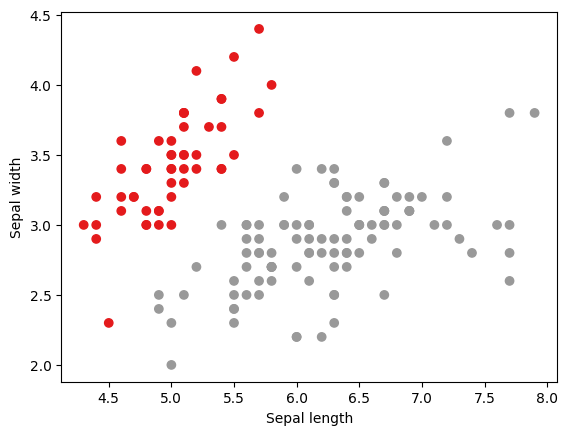

In [109]:
iris = datasets.load_iris()

x = iris.data[:, :2]
y = (iris.target != 0)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

split data

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test  = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

torch.Size([105, 2]) torch.Size([45, 2]) torch.Size([105, 1]) torch.Size([45, 1])


class for model

In [111]:
class LogisticRegression(nn.Module):

    def __init__(self, in_features=2, n_classes=1 ):
        super().__init__()
        self.l1 = nn.Linear(in_features=in_features, out_features=n_classes)
#         self.sig = nn.Sigmoid()
    def forward(self, x):
        return torch.sigmoid(self.l1(x))



In [114]:
!pip install torchinfo
from torchinfo import summary



model parameters

In [115]:
LR = 0.1

model = LogisticRegression()

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

w,b   = model.parameters()
print(w,b)

summary(model,input_size = x.shape[1:])

Parameter containing:
tensor([[0.4935, 0.0819]], requires_grad=True) Parameter containing:
tensor([-0.3811], requires_grad=True)


Layer (type:depth-idx)                   Output Shape              Param #
LogisticRegression                       [1]                       --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

training

Epoch:  1  Loss:  1.0997129678726196
Epoch:  21  Loss:  0.5547044277191162
Epoch:  41  Loss:  0.4775103032588959
Epoch:  61  Loss:  0.4185674488544464
Epoch:  81  Loss:  0.37287789583206177


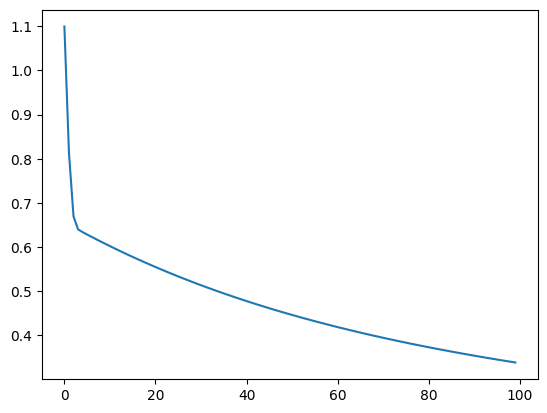

In [70]:
epochs = 100
losses = np.zeros(epochs)

for i in range(epochs):
    predict = model.forward(x_train)

    loss = criterion(predict, y_train)

    losses[i] = loss.data.numpy()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if(i//20 == i/20):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

evaluation

In [71]:
predict = model.forward(x_test)

In [72]:
print(torch.mean(torch.round(predict)-torch.round(y_test)).data)

tensor(0.0222)


visualization of results

Text(0.5, 1.0, 'Predicted FOR ALL')

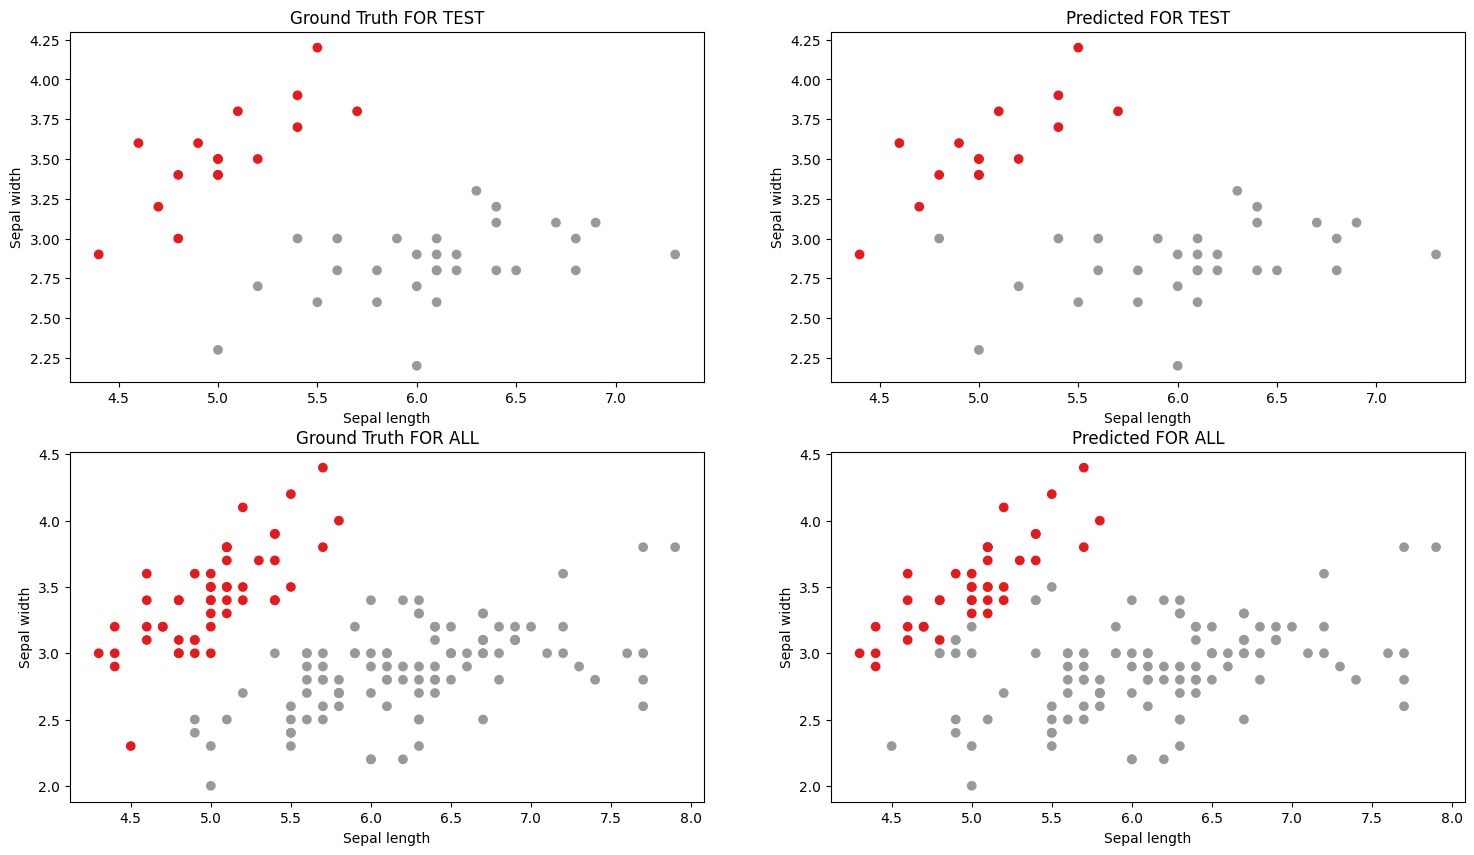

In [73]:
plt.figure(figsize=(18,10))

plt.subplot(221)
# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=torch.squeeze(y_test), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR TEST')

predict = model.forward(x_test)

plt.subplot(222)
# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=np.round(np.squeeze(predict.data.numpy())), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR TEST')

predict = model.forward(torch.from_numpy(x.astype(np.float32)))

plt.subplot(223)
# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(y)), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR ALL')

plt.subplot(224)
# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(predict.data.numpy())), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR ALL')

---

### Softmax regression example

dataset with three classes

In [74]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

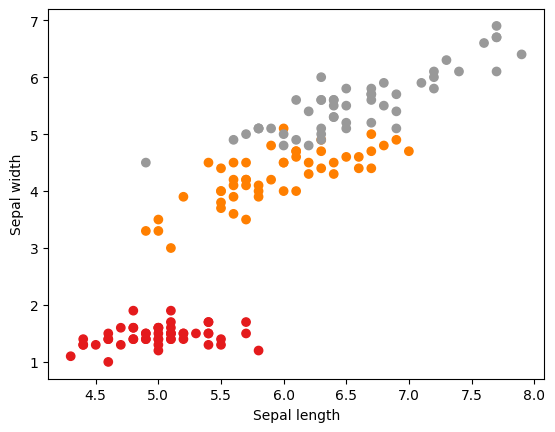

(150, 2)
(150,)
torch.Size([105, 2]) torch.Size([45, 2]) torch.Size([105, 1]) torch.Size([45, 1])


In [75]:
iris = datasets.load_iris()

x = iris.data[:,[0,2] ]
y = (iris.target)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# standardize
x[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

print(x.shape)
print(y.shape)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test  = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model

In [76]:
class SoftmaxRegression(LogisticRegression):

    def __init__(self,
                 in_features = 2,
                 n_classes   = 3):

        super().__init__(in_features = in_features,
                         n_classes   = n_classes)

    def forward(self, x):
        return torch.nn.functional.softmax(self.l1(x), dim=1)

training

In [119]:
!pip install torchinfo
from torchinfo import summary

In [122]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out  # No softmax here as CrossEntropyLoss includes it

In [123]:
LR = 0.1

model = SoftmaxRegression(x_train.shape[1],3)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

w,b   = model.parameters()
print(w,b)
summary(model,input_size = x.shape[1:])

Parameter containing:
tensor([[-0.6394, -0.3646],
        [-0.6192, -0.1618],
        [ 0.1443, -0.6625]], requires_grad=True) Parameter containing:
tensor([ 0.6174,  0.4436, -0.6922], requires_grad=True)


Layer (type:depth-idx)                   Output Shape              Param #
SoftmaxRegression                        [3]                       --
├─Linear: 1-1                            [3]                       9
Total params: 9
Trainable params: 9
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

Epoch:  1  Loss:  2.299955129623413
Epoch:  81  Loss:  0.26066723465919495
Epoch:  161  Loss:  0.17504659295082092
Epoch:  241  Loss:  0.13830479979515076
Epoch:  321  Loss:  0.11760728061199188


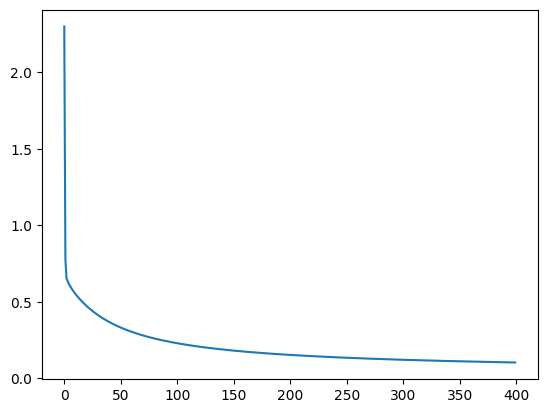

In [124]:
epochs = 400
losses = np.zeros(epochs)

for i in range(epochs):

    predict = model.forward(x_train)

    loss = criterion(predict, torch.squeeze(y_train).type(torch.long))

    losses[i] = loss.data.numpy()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if(i//(epochs//5) == i/(epochs//5)):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

evaluation

raw output of softmax (without max)

torch.Size([150, 3])


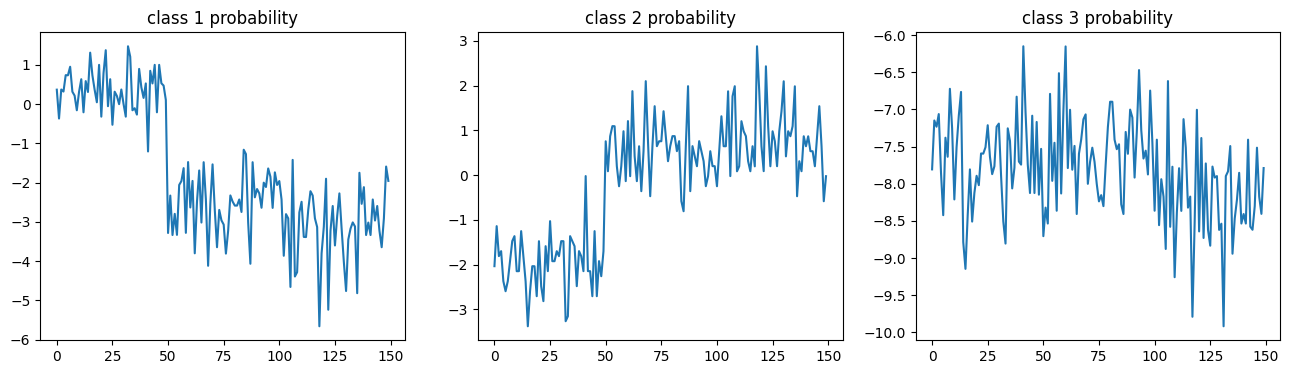

In [125]:
predict = model.forward(torch.from_numpy(x).type(torch.float))
print(predict.shape)
plt.figure(figsize = (16,4))
plt.subplot(1,3,1);plt.plot(predict.data.numpy()[:,0]);plt.title('class 1 probability')
plt.subplot(1,3,2);plt.plot(predict.data.numpy()[:,1]);plt.title('class 2 probability')
plt.subplot(1,3,3);plt.plot(predict.data.numpy()[:,2]);plt.title('class 3 probability')
plt.show()

output of the model

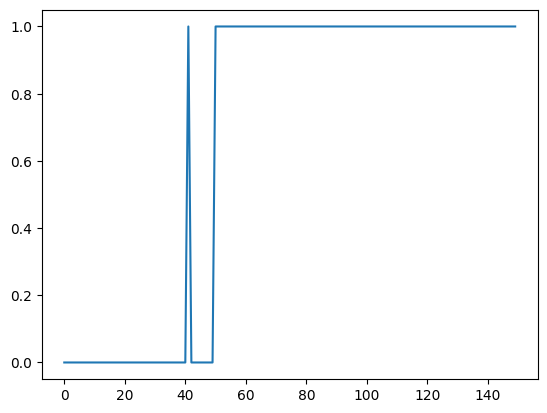

In [126]:
lables_predicted = predict.data.numpy().argmax(axis=1)
lables_predicted.shape
plt.plot(lables_predicted)

visualization

Text(0.5, 1.0, 'Predicted FOR ALL')

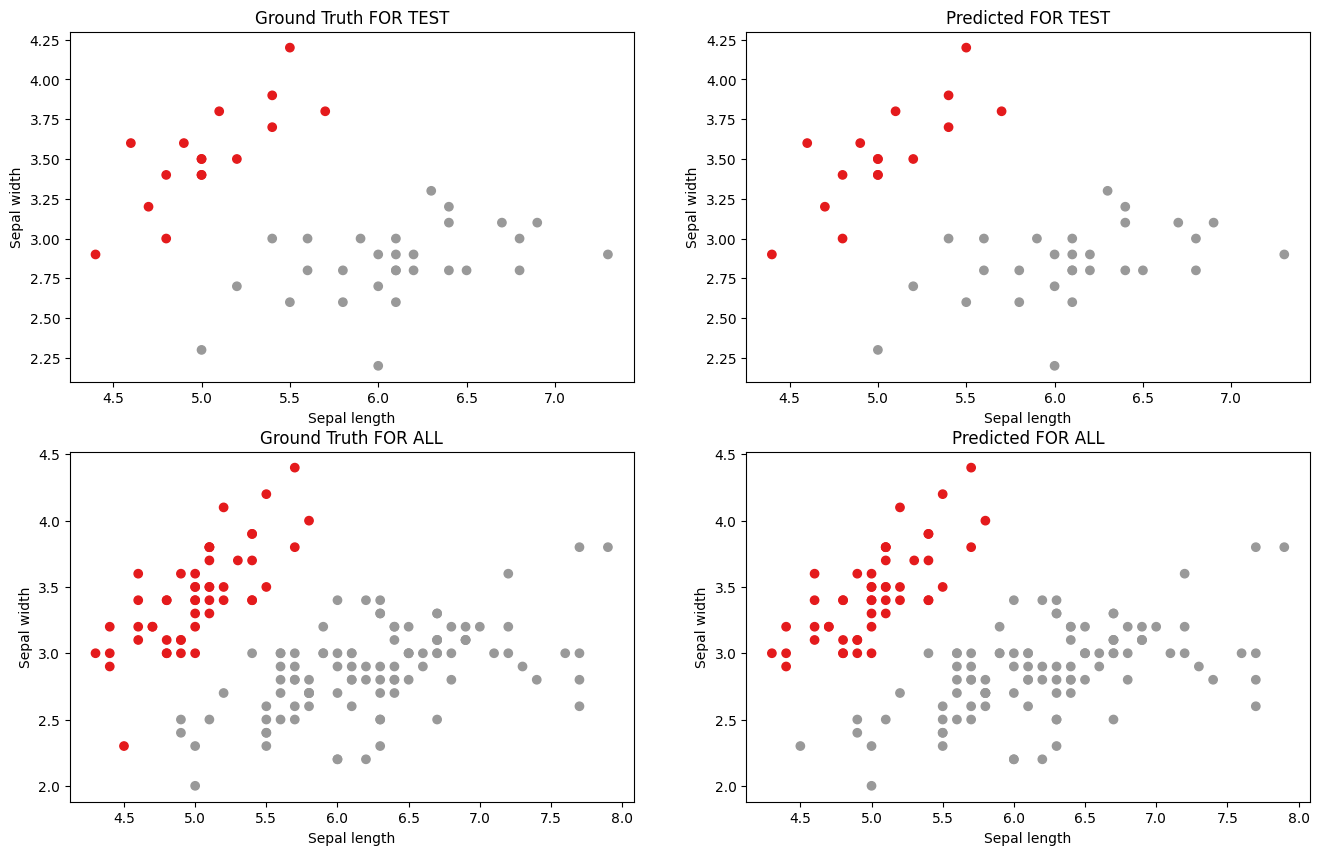

In [127]:
plt.figure(figsize=(16,10))

plt.subplot(221)
# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=torch.squeeze(y_test), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR TEST')



predict = model.forward(x_test)
lables_predicted = predict.data.numpy().argmax(axis=1)

plt.subplot(222)
# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=lables_predicted, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR TEST')


predict = model.forward(torch.from_numpy(x.astype(np.float32)))
lables_predicted = predict.data.numpy().argmax(axis=1)

plt.subplot(223)
# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(y)), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR ALL')

plt.subplot(224)
# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=lables_predicted, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR ALL')


### Exercise  3
Implement the model using
```python
Sequential
```



<details>
<summary>Click here for hint</summary>

```python
    
    model = nn.Sequential(
        nn.Linear(in_features=x_train.shape[1], out_features=1),
        nn.Sigmoid()    )    
    
```

</details>

In [128]:

from sklearn.datasets import make_classification
from torch.utils.data import DataLoader, TensorDataset

# Generate  data
X, y = make_classification(n_samples=200, n_features=4, n_classes=2, random_state=42)
x_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)

#  Sequential model
model = nn.Sequential(
    nn.Linear(x_train.shape[1], 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

#  training
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

# Training  with batching
for epoch in range(100):
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        y_pred = model(batch_x)
        loss = criterion(y_pred, batch_y)
        loss.backward()
        optimizer.step()
    scheduler.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.4981
Epoch 10, Loss: 0.3072
Epoch 20, Loss: 0.2174
Epoch 30, Loss: 0.0394
Epoch 40, Loss: 0.0671
Epoch 50, Loss: 0.5986
Epoch 60, Loss: 0.2252
Epoch 70, Loss: 0.2826
Epoch 80, Loss: 0.2948
Epoch 90, Loss: 0.3442


In [129]:

# Evaluation
with torch.no_grad():
    y_pred = model(x_train)
    accuracy = ((y_pred > 0.5).float() == y_train).float().mean()
print(f"Training Accuracy: {accuracy.item()*100:.2f}%")

Training Accuracy: 89.00%


---

## Full connected neural network with PyTorch

Let's test torch in the fully connected network training problem

![MLP](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSy34_CeT3sV3jpkCm7GqZWSqfbdapSUaAQ2A&usqp=CAU)

In [130]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

We will use the popular MNIST dataset.

The MNIST dataset (Modified National Institute of Standards and Technology) is a database of handwritten digits (0--9) - one of the most popular dataset in the computer vision.

The MNIST contains 60,000 training images and 10,000 testing images.

Each image has dimensions of 28 by 28 pixels in grayscale.

We will load data using the `torchvision` library.

For dataset we will use transformations determined by `transforms.Compose` function.

After all we will use the `torch.utils.data.DataLoader()` function to prepare the data loading for training and testing datasets.
<!-- https://www.pluralsight.com/guides/building-deep-learning-networks-with-pytorch-->


In [131]:
BATCH_SIZE = 64

transform=transforms.Compose([
                           transforms.ToTensor()
                            ])

train = torchvision.datasets.MNIST('',
                                   train=True,
                                   download=True,
                                   transform  = transform)

test  = torchvision.datasets.MNIST('',
                                   train=False,
                                   download=True,
                                   transform =transform)

trainset = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)

testset  = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)


In [132]:

trainset_shape = trainset.dataset.data.shape
testset_shape  = testset.dataset.data.shape

print(trainset_shape, testset_shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [133]:
images, _ = dataiter = next(iter(trainset))
images.shape

torch.Size([64, 1, 28, 28])

In [134]:
import matplotlib.pyplot as plt
import numpy as np
def image_show(images):
    images = images.numpy()
    images = images.transpose((1, 2, 0))
    print(images.shape)
    plt.imshow(images)
    plt.show()

(233, 233, 3)


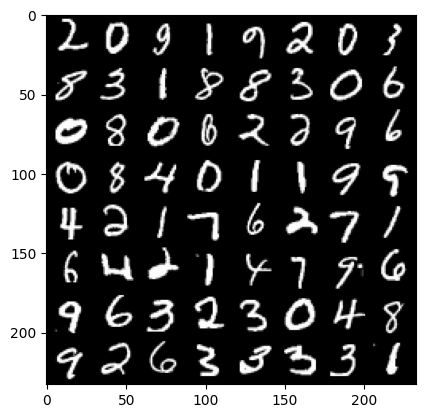

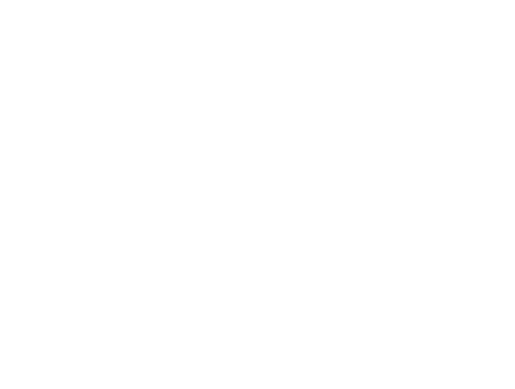

In [135]:
# get some random training images batch
images, _ = dataiter = next(iter(trainset))
# image_show(torchvision.utils.make_grid(images, nrow = 8, padding = 1))

## show images
image_show(torchvision.utils.make_grid(images[:,:,:,:], nrow = 8, padding = 1)); plt.axis('off'); plt.show()

Model Training

We create a class Net for the model. The model contains 3 layers. Each hidden layers contains 64 outputs. The only change in the output layer is 10 outputs, representing ten classes of the images.

For hidden layers we will use `relu` or Rectified Linear Activation function.
For the output layer, we'll use the `softmax` function, often used for a multi-class classification problem.

*Note* instead of just `softmax` we will use `log(softmax(x))` due to the requirement of the loss function implementation.


In [136]:
IMAGE_WIDTH = 28
IMAGE_HEIGH = 28

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(IMAGE_WIDTH*IMAGE_HEIGH, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)   #log(softmax(x))


In [137]:
net = Net()
# print(net)
summary(net,input_size =(1,784))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Linear: 1-1                            [1, 64]                   50,240
├─Linear: 1-2                            [1, 64]                   4,160
├─Linear: 1-3                            [1, 10]                   650
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.06
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.22
Estimated Total Size (MB): 0.22

We’ll use the adam optimizer to optimize the network.
We’ll use the cross entropy as loss function.
The `lr` argument specifies the learning rate of the optimizer function.

In [138]:
criterion = nn.CrossEntropyLoss() #This criterion requires `log_softmax`
optimizer = optim.Adam(net.parameters(), lr=0.005)

Training.

 We’ll have five full passes over the data (5 epochs).

The function `net.zero_grad()` sets gradients to zero before the loss calculation.
The function `net(X.view(-1,784))` allows to reshape the images in the batch into the 1-D vectors.
The number 784 is a result of the 28 by 28 image dimensions.

The `criterion(output, y)` function calculates the loss value.

 The last line of the code prints the loss for each epoch

In [139]:
EPOCHS = 5

for epoch in range(EPOCHS):
    net.train()
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,784))
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    print('[epoch:%d/%d]'%(epoch,EPOCHS), 'loss val = %.4f'%(loss.item()) )


[epoch:0/5] loss val = 0.2258
[epoch:1/5] loss val = 0.1339
[epoch:2/5] loss val = 0.0357
[epoch:3/5] loss val = 0.0135
[epoch:4/5] loss val = 0.0134


next step is to evaluate the model on the test data set.

In [92]:
correct = 0
total   = 0

net.eval()
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))

        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 2))

Accuracy:  0.97


### Exercise 5
1. Try to transform the network to the autoencoder problem.
> for vector to image transform use  X.view(-1,28,28)

![image.png](attachment:f832f15f-45eb-4cb5-aef6-bd4f8eb56d0d.png)

In [140]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  # 16x14x14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # 32x7x7
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [141]:
#  training
conv_ae = ConvAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(conv_ae.parameters(), lr=0.001)

for epoch in range(5):
    for data in trainset:
        img, _ = data
        optimizer.zero_grad()
        output = conv_ae(img)
        loss = criterion(output, img)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')


Epoch 1, Loss: 0.0014
Epoch 2, Loss: 0.0008
Epoch 3, Loss: 0.0007
Epoch 4, Loss: 0.0006
Epoch 5, Loss: 0.0006


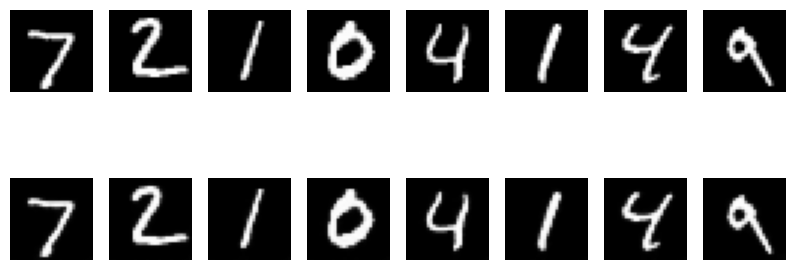

In [142]:
# Visualizing results
with torch.no_grad():
    test_img, _ = next(iter(testset))
    reconstructed = conv_ae(test_img[:8])

    plt.figure(figsize=(10,4))
    for i in range(8):
        # Original
        plt.subplot(2,8,i+1)
        plt.imshow(test_img[i].squeeze(), cmap='gray')
        plt.axis('off')
        # Reconstructed
        plt.subplot(2,8,i+9)
        plt.imshow(reconstructed[i].squeeze().numpy(), cmap='gray')
        plt.axis('off')
    plt.show()

Besides just working with the dataset as itself we can increase dataset size using augmentation techniques.
This operation can be done statically (before training, not recommended), or dynamically (during batch upload). The last one can be done through the transforms as is shown below.

In [143]:
transform = transforms.Compose([
                                transforms.Resize((32, 32)),
                                transforms.RandomCrop(28),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                               ])


train = torchvision.datasets.MNIST('',
                                   train=True,
                                   download=True,
                                   transform  = transform)

test  = torchvision.datasets.MNIST('',
                                   train=False,
                                   download=True,
                                   transform =transform)

trainset = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)

testset  = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)


(233, 233, 3)


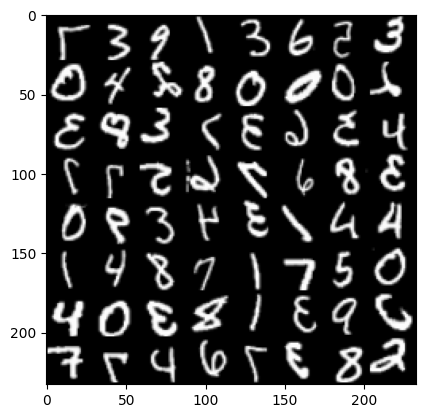

In [144]:

images, _ = dataiter = next(iter(trainset))
image_show(torchvision.utils.make_grid(images, nrow = 8, padding = 1))

Below you may find more complex transformations pipeline.<br>
*Note*  `PyTorch` allows you to work natively with the `numpy`, `Pillow` (`PIL`) and `tensor` formats of images.

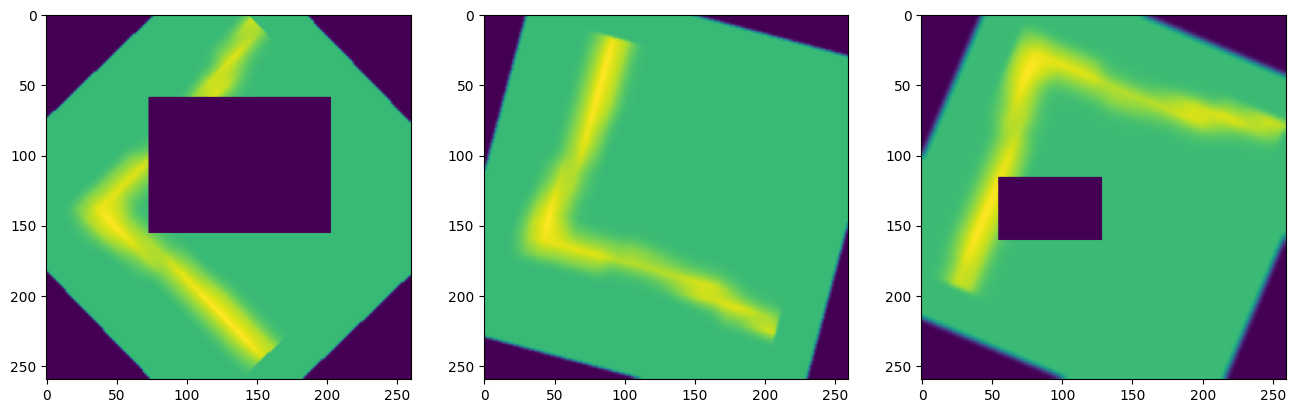

In [145]:
import torchvision.transforms as T

to_pil = T.ToPILImage()
img = to_pil(images[0])

padding = 30
kernel_size = 53

preprocess = T.Compose([
               T.ToTensor(),
               T.Resize(300),
               T.CenterCrop(250),
               T.RandomCrop(200),
               T.Pad(padding=padding),
               lambda x:x**2+2,
               T.RandomRotation(degrees=180),
               T.RandomPerspective(distortion_scale=0.6, p=0.3),
               T.GaussianBlur(kernel_size=kernel_size),
               T.RandomApply([T.RandomErasing(),T.RandomHorizontalFlip()],p=0.6),
               T.Normalize(mean=[0.5],std=[0.225])
                ])

plt.figure(figsize = (16,8))

x = preprocess(img)
plt.subplot(131);plt.imshow(x[0,:,:])

x = preprocess(img)
plt.subplot(132); plt.imshow(x[0,:,:])

x = preprocess(img)
plt.subplot(133); plt.imshow(x[0,:,:])

Actually, you may work with images as with `PIL` object and then transform it backwards to tensor.

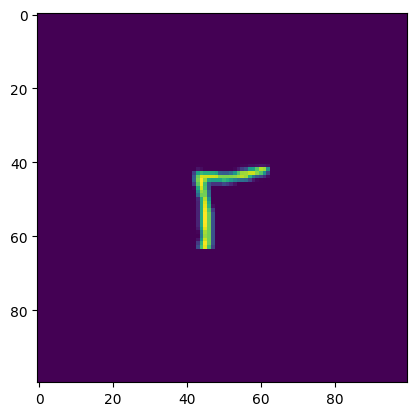

In [146]:
from PIL import Image

to_pil = transforms.ToPILImage()
img = to_pil(images[0])

transforms.ToTensor()

center_crops = transforms.CenterCrop(size=100)(img)
center_crops.show()

torch_image = transforms.ToTensor()(center_crops)
plt.imshow(torch_image[0,:,:])

also you may use transforms as separate functions for tensors images

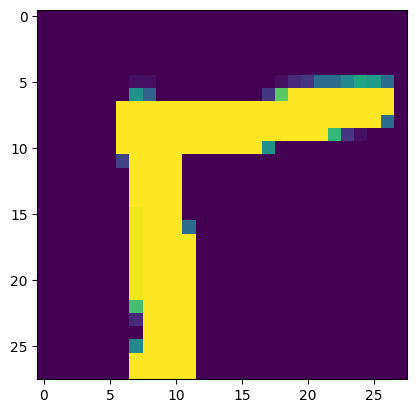

In [147]:

new_img = T.functional.adjust_brightness(img,brightness_factor=10)
plt.imshow(new_img)

### Exercise 6 (OPTIONAL)
1. Try to improve accuracy of the neural network (shown above) for classification problem, using transform data augmentation and other techniques you know.


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomAffine(degrees=5, translate=(0.05, 0.05)),
    transforms.Normalize((0.1307,), (0.3081,))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Loading Data
train_set = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=train_transform)
test_set = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=test_transform)

train_loader = DataLoader(train_set, batch_size=512, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=1024, shuffle=False, num_workers=2, pin_memory=True)

#Lean and Mean Model Architecture
class FastMNISTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # Keep spatial dims
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

In [7]:


# Training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FastMNISTNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

#
for epoch in range(5):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


In [8]:

#Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}% (Time-optimized)')

Test Accuracy: 99.08% (Time-optimized)
